# –ü—Ä–æ–¥–≤–∏–Ω—É—Ç–æ–µ –≥–ª—É–±–æ–∫–æ–µ –æ–±—É—á–µ–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ —Å –ø–æ–¥–∫—Ä–µ–ø–ª–µ–Ω–∏–µ–º: –î–ó 2

–í—Ç–æ—Ä–æ–µ –¥–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ –æ–ø—è—Ç—å –ø–æ—Å–≤—è—â–µ–Ω–æ –∏–≥—Ä–µ; –µ–≥–æ –±–∞–∑–æ–≤–∞—è —á–∞—Å—Ç—å, –Ω–∞–¥–µ—é—Å—å, –Ω–µ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–∞—è, –Ω–æ —è –¥–æ–±–∞–≤–∏–ª –æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω—É—é —á–∞—Å—Ç—å, –∫–æ—Ç–æ—Ä–∞—è, –¥—É–º–∞—é, –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–π –¥–ª—è –ª—é–±–æ–≥–æ —Å–ª—É—à–∞—Ç–µ–ª—è. –ö–∞–∫ –æ–±—ã—á–Ω–æ, **–≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ä–µ—à–µ–Ω–∏—è –æ–∂–∏–¥–∞–µ—Ç—Å—è —Å—Å—ã–ª–∫–∞ –Ω–∞ Jupyter-–Ω–æ—É—Ç–±—É–∫ –Ω–∞ –≤–∞—à–µ–º GitHub (–∏–ª–∏ –ø—É–±–ª–∏—á–Ω—ã–π, –∏–ª–∏ —Å –¥–æ—Å—Ç—É–ø–æ–º –¥–ª—è *snikolenko*); —Å—Å—ã–ª–∫—É –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –Ω—É–∂–Ω–æ –ø—Ä–∏—Å–ª–∞—Ç—å –≤ –≤–∏–¥–µ —Å–¥–∞–Ω–Ω–æ–≥–æ –¥–æ–º–∞—à–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è –Ω–∞ –ø–æ—Ä—Ç–∞–ª–µ –ê–∫–∞–¥–µ–º–∏–∏**. –õ—é–±—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏, –Ω–æ–≤—ã–µ –∏–¥–µ–∏ –∏ —Ä–∞—Å—Å—É–∂–¥–µ–Ω–∏—è –Ω–∞ —Ç–µ–º—É, –∫–∞–∫ –≤—Å–µ–≥–¥–∞, –∫–∞—Ç–µ–≥–æ—Ä–∏—á–µ—Å–∫–∏ –ø—Ä–∏–≤–µ—Ç—Å—Ç–≤—É—é—Ç—Å—è.

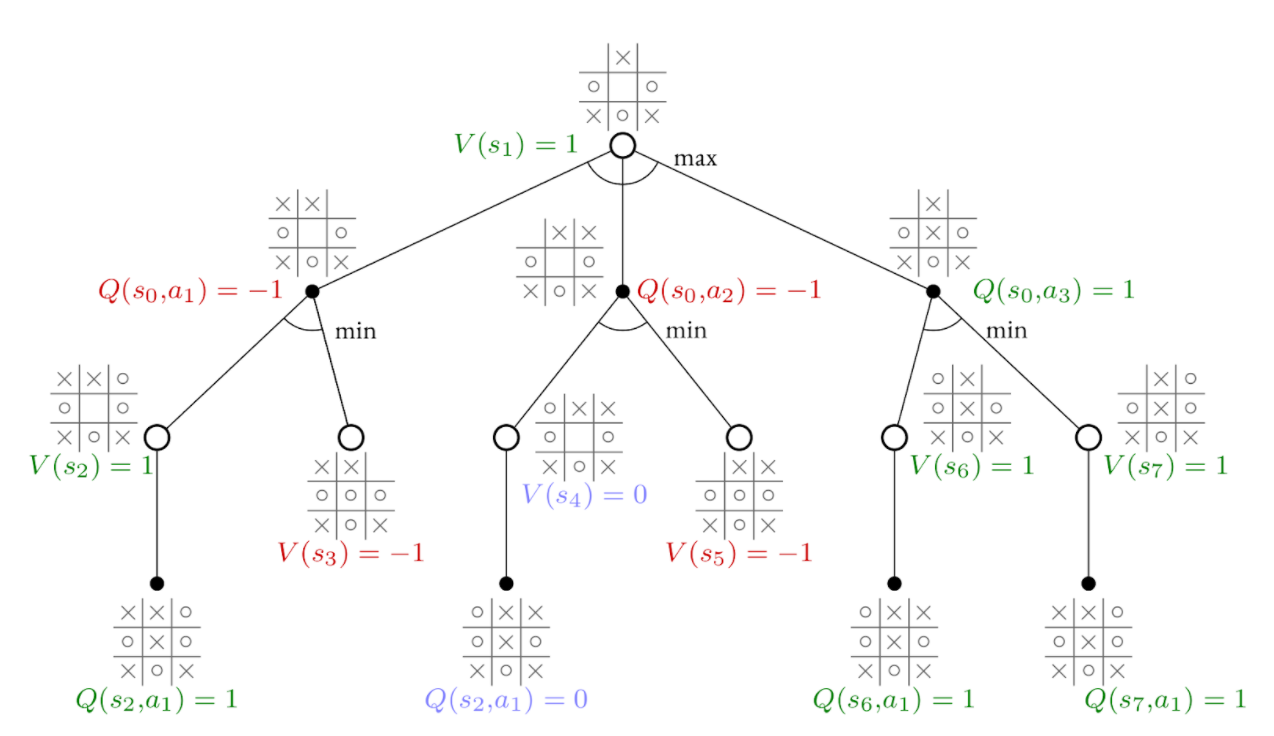

# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [1]:
import copy
import random
from collections import deque
from collections.abc import Iterable

import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from tqdm import tqdm

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# –ß–∞—Å—Ç—å –ø–µ—Ä–≤–∞—è: –∫—Ä–µ—Å—Ç–∏–∫–∏-–Ω–æ–ª–∏–∫–∏ –ø—Ä–∏ –ø–æ–º–æ—â–∏ Q-–æ–±—É—á–µ–Ω–∏—è

–í –∫–æ–¥–µ, –ø—Ä–∏–ª–∞–≥–∞—é—â–µ–º—Å—è –∫ –ø–æ—Å–ª–µ–¥–Ω–µ–π –ª–µ–∫—Ü–∏–∏ –ø—Ä–æ –æ–±—É—á–µ–Ω–∏–µ —Å –ø–æ–¥–∫—Ä–µ–ø–ª–µ–Ω–∏–µ–º, —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω Environment –¥–ª—è –∫—Ä–µ—Å—Ç–∏–∫–æ–≤-–Ω–æ–ª–∏–∫–æ–≤, –≤ –∫–æ—Ç–æ—Ä–æ–º –º–æ–∂–Ω–æ –ø—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ —É–∫–∞–∑—ã–≤–∞—Ç—å —Ä–∞–∑–Ω—ã–µ —Ä–∞–∑–º–µ—Ä—ã –¥–æ—Å–∫–∏ –∏ —É—Å–ª–æ–≤–∏—è –ø–æ–±–µ–¥—ã, –∞ —Ç–∞–∫–∂–µ —Ñ—É–Ω–∫—Ü–∏–∏ –¥–ª—è —Ä–∏—Å–æ–≤–∞–Ω–∏—è, –≤ —Ç–æ–º —á–∏—Å–ª–µ —Å —É–∫–∞–∑–∞–Ω–∏–µ–º –æ—Ü–µ–Ω–∫–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –¥–µ–π—Å—Ç–≤–∏–π. –° —ç—Ç–∏–º –æ–∫—Ä—É–∂–µ–Ω–∏–µ–º –≤—Å–µ –∑–∞–¥–∞–Ω–∏—è –∏ —Å–≤—è–∑–∞–Ω—ã.

In [3]:
CROSSES = 1
NOUGHTS = -1
DRAW = 0
AGENTS = (CROSSES, NOUGHTS)

In [4]:
class TicTacToe(gym.Env):
    def __init__(self, n_rows, n_cols, n_win, clone=None):
        if clone is not None:
            self.n_rows = clone.n_rows
            self.n_cols = clone.n_cols
            self.n_win = clone.n_win
            self.board = copy.deepcopy(clone.board)
            self.curTurn = clone.curTurn
            self.emptySpaces = None
            self.boardHash = None
        else:
            self.n_rows = n_rows
            self.n_cols = n_cols
            self.n_win = n_win

            self.reset()

    def getEmptySpaces(self):
        if self.emptySpaces is None:
            res = np.where(self.board == 0)
            self.emptySpaces = np.array([(i, j) for i, j in zip(res[0], res[1])])
        return self.emptySpaces

    def makeMove(self, player, i, j):
        self.board[i, j] = player
        self.emptySpaces = None
        self.boardHash = None

    def getHash(self):
        if self.boardHash is None:
            self.boardHash = "".join(
                [f"{x + 1}"
                 for x in self.board.reshape(self.n_rows * self.n_cols)]
            )
        return self.boardHash

    def isTerminal(self):
        # –ø—Ä–æ–≤–µ—Ä–∏–º, –Ω–µ –∑–∞–∫–æ–Ω—á–∏–ª–∞—Å—å –ª–∏ –∏–≥—Ä–∞
        cur_marks, cur_p = np.where(self.board == self.curTurn), self.curTurn
        for i, j in zip(cur_marks[0], cur_marks[1]):
            win = False
            if i <= self.n_rows - self.n_win:
                if np.all(self.board[i:i + self.n_win, j] == cur_p):
                    win = True
            if not win:
                if j <= self.n_cols - self.n_win:
                    if np.all(self.board[i, j:j + self.n_win] == cur_p):
                        win = True
            if not win:
                if i <= self.n_rows - self.n_win and j <= self.n_cols - self.n_win:
                    if np.all(np.array([self.board[i + k, j + k] == cur_p
                                        for k in range(self.n_win)])):
                        win = True
            if not win:
                if i <= self.n_rows - self.n_win and j >= self.n_win - 1:
                    if np.all(np.array([self.board[i + k, j - k] == cur_p
                                        for k in range(self.n_win)])):
                        win = True
            if win:
                self.gameOver = True
                return self.curTurn

        if len(self.getEmptySpaces()) == 0:
            self.gameOver = True
            return 0

        self.gameOver = False
        return None

    def printBoard(self):
        for i in range(0, self.n_rows):
            print("----" * (self.n_cols) + "-")
            out = "| "
            for j in range(0, self.n_cols):
                if self.board[i, j] == 1:
                    token = "x"
                if self.board[i, j] == -1:
                    token = "o"
                if self.board[i, j] == 0:
                    token = " "
                out += token + " | "
            print(out)
        print("----" * (self.n_cols) + "-")

    def getState(self):
        return (self.getHash(), self.getEmptySpaces(), self.curTurn)

    def action_from_int(self, action_int):
        return (int(action_int / self.n_cols), int(action_int % self.n_cols))

    def int_from_action(self, action):
        return action[0] * self.n_cols + action[1]

    def step(self, action):
        if self.board[action[0], action[1]] != 0:
            return self.getState(), -10, True, {}
        self.makeMove(self.curTurn, action[0], action[1])
        reward = self.isTerminal()
        self.curTurn = -self.curTurn
        return self.getState(), 0 if reward is None else reward, reward is not None, {}

    def reset(self):
        self.board = np.zeros((self.n_rows, self.n_cols), dtype=int)
        self.boardHash = None
        self.gameOver = False
        self.emptySpaces = None
        self.curTurn = 1

In [5]:
def plot_board(env, pi, showtext=True, verbose=True, fontq=20, fontx=60):
    """–†–∏—Å—É–µ–º –¥–æ—Å–∫—É —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –∏–∑ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ pi"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    X, Y = np.meshgrid(np.arange(0, env.n_rows), np.arange(0, env.n_rows))
    Z = np.zeros((env.n_rows, env.n_cols)) + .01
    s, actions = env.getHash(), env.getEmptySpaces()

    if pi is not None and s in pi.Q:
        for i, a in enumerate(actions):
            Z[a[0], a[1]] = pi.Q[s][i]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(Z, cmap=plt.get_cmap("Accent", 10), vmin=-1, vmax=1)

    if showtext:
        for i, a in enumerate(actions):
            if pi is not None and s in pi.Q:
                ax.text(a[1], a[0], "%.3f" % pi.Q[s][i], fontsize=fontq,
                        horizontalalignment="center",
                        verticalalignment="center",
                        color="w")

    for i in range(env.n_rows):
        for j in range(env.n_cols):
            if env.board[i, j] == -1:
                ax.text(j, i, "O", fontsize=fontx,
                        horizontalalignment="center",
                        verticalalignment="center",
                        color="w")
            if env.board[i, j] == 1:
                ax.text(j, i, "X", fontsize=fontx,
                        horizontalalignment="center",
                        verticalalignment="center",
                        color="w")
    ax.grid(False)
    plt.show()


def get_and_print_move(env, pi, s, actions, random=False, verbose=True,
                       fontq=20, fontx=60):
    """–î–µ–ª–∞–µ–º —Ö–æ–¥, —Ä–∏—Å—É–µ–º –¥–æ—Å–∫—É"""
    plot_board(env, pi, fontq=fontq, fontx=fontx)

    if verbose and (pi is not None):
        if s in pi.Q:
            for i, a in enumerate(actions):
                print(i, a, pi.Q[s][i])
        else:
            print("–°—Ç—Ä–∞—Ç–µ–≥–∏—è –Ω–µ –∑–Ω–∞–µ—Ç, —á—Ç–æ –¥–µ–ª–∞—Ç—å...")

    if random:
        return np.random.randint(len(actions))
    else:
        return pi.getActionGreedy(s, len(actions))

In [6]:
def plot_test_game(env, pi1, pi2, random_crosses=False, random_naughts=True,
                   verbose=True, fontq=20, fontx=60):
    """
    –ò–≥—Ä–∞–µ–º —Ç–µ—Å—Ç–æ–≤—É—é –ø–∞—Ä—Ç–∏—é –º–µ–∂–¥—É —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º–∏ –∏–ª–∏ —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º–∏ —Ö–æ–¥–∞–º–∏,
    —Ä–∏—Å—É–µ–º —Ö–æ–¥ –∏–≥—Ä—ã
    """
    done = False
    env.reset()
    while not done:
        s, actions = env.getHash(), env.getEmptySpaces()
        if env.curTurn == 1:
            a = get_and_print_move(env, pi1, s, actions, random=random_crosses,
                                   verbose=verbose, fontq=fontq, fontx=fontx)
        else:
            a = get_and_print_move(env, pi2, s, actions, random=random_naughts,
                                   verbose=verbose, fontq=fontq, fontx=fontx)
        _, reward, done, _ = env.step(actions[a])
        if reward == 1:
            print("–ö—Ä–µ—Å—Ç–∏–∫–∏ –≤—ã–∏–≥—Ä–∞–ª–∏!")
            plot_board(env, None, showtext=False, fontq=fontq, fontx=fontx)
        if reward == -1:
            print("–ù–æ–ª–∏–∫–∏ –≤—ã–∏–≥—Ä–∞–ª–∏!")
            plot_board(env, None, showtext=False, fontq=fontq, fontx=fontx)

–°–æ–∑–¥–∞–¥–∏–º –¥–æ—Å–∫–∏ —Ä–∞–∑–º–µ—Ä–æ–º 3 –Ω–∞ 3, 4 –Ω–∞ 4 –∏ 5 –Ω–∞ 5, —á—Ç–æ–±—ã –Ω–µ —Å–æ–∑–¥–∞–≤–∞—Ç—å –∏—Ö –∑–∞–Ω–æ–≤–æ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º:

In [7]:
ENV_3 = TicTacToe(n_rows=3, n_cols=3, n_win=3)
ENV_4 = TicTacToe(n_rows=4, n_cols=4, n_win=4)
ENV_5 = TicTacToe(n_rows=5, n_cols=5, n_win=5)

1. –†–µ–∞–ª–∏–∑—É–π—Ç–µ –æ–±—ã—á–Ω–æ–µ (—Ç–∞–±–ª–∏—á–Ω–æ–µ) Q-–æ–±—É—á–µ–Ω–∏–µ. –û–±—É—á–∏—Ç–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∫—Ä–µ—Å—Ç–∏–∫–æ–≤ –∏ –Ω–æ–ª–∏–∫–æ–≤ –¥–ª—è –¥–æ—Å–∫–∏ 3—Ö3.

In [8]:
class RandomPolicy:
    def select_action(self, state, player: int = None, eps: float = 0.0):
        _, empty_spaces, _ = state
        return np.random.randint(len(empty_spaces))

In [9]:
class EpsGreedyPolicy:
    def __init__(self):
        self.Q = {}

    def select_action(self, state, player: int = None, eps: float = 0.0):
        board_hash, empty_spaces, _ = state

        if random.random() >= eps and board_hash in self.Q:
            return np.argmax(self.Q[board_hash])

        if board_hash not in self.Q:
            self.Q[board_hash] = np.zeros(len(empty_spaces))

        return np.random.randint(len(empty_spaces))

–ë—É–¥–µ–º –æ–±—É—á–∞—Ç—å —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∫—Ä–µ—Å—Ç–∏–∫–æ–≤ –∏ –Ω–æ–ª–∏–∫–æ–≤ –æ–¥–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ –¥—Ä—É–≥ –Ω–∞ –¥—Ä—É–≥–µ, –∞ –æ—Ü–µ–Ω–∏–≤–∞—Ç—å –ø—Ä–æ–≥—Ä–µ—Å—Å –Ω–∞ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏.

In [10]:
def run_episode(env, policies: dict, eps: float = 0.0):
    env.reset()
    state = env.getState()
    _, empty_spaces, cur_turn = state

    done = False
    while not done:
        action = policies[cur_turn].select_action(state, cur_turn, eps)
        action = action if isinstance(action, Iterable) else empty_spaces[action]
        state, reward, done, _ = env.step(action)
        _, empty_spaces, cur_turn = state

    return reward

In [11]:
def test_performance(env, policies: dict, num_experiments: int = 1,
                     verbose: bool = False,
                     show_progress: bool = True):
    crosses_wins = 0
    naughts_wins = 0
    draws = 0
    history = {
        "indices": [],
        "crosses": [],
        "noughts": [],
        "draws": []
    }
    for i in tqdm(range(num_experiments), disable=not show_progress):
        reward = run_episode(env, {CROSSES: policies[CROSSES], NOUGHTS: policies[NOUGHTS]}, eps=0)
        crosses_wins += int(reward == CROSSES)
        naughts_wins += int(reward == NOUGHTS)
        draws += int(reward == DRAW)
        history["indices"].append(i + 1)
        history["crosses"].append(crosses_wins / (i + 1))
        history["noughts"].append(naughts_wins / (i + 1))
        history["draws"].append(draws / (i + 1))
    
    if verbose:
        print(f"Average crosses winrate: {history['crosses'][-1]:.4f}")
        print(f"Average noughts winrate: {history['noughts'][-1]:.4f}")

    return history

In [12]:
def q_learning_episode(env, policies: dict, alpha: float, gamma: float, eps: float):
    prev_dict = {
        agent: {"action_index": None, "board_hash": None}
        for agent in policies
    }

    env.reset()
    state = env.getState()
    board_hash, empty_spaces, cur_turn = state

    done = False
    while not done:
        action_index = policies[cur_turn].select_action(state, cur_turn, eps)
        state, reward, done, _ = env.step(empty_spaces[action_index])
        if reward == cur_turn:
            policies[cur_turn].Q[board_hash][action_index] = abs(reward)

        # use new state and reward to update opposite policy weights
        next_board_hash, next_empty_spaces, next_turn = state
        prev_board_hash = prev_dict[next_turn]["board_hash"]
        prev_action_index = prev_dict[next_turn]["action_index"]
        if prev_board_hash is not None:
            gamma_term = gamma * np.max(policies[next_turn].Q[next_board_hash]) \
                         if next_board_hash in policies[next_turn].Q else 0
            policies[next_turn].Q[prev_board_hash][prev_action_index] += alpha * (
                -reward + gamma_term
                - policies[next_turn].Q[prev_board_hash][prev_action_index]
            )

        prev_dict[cur_turn] = {"action_index": action_index, "board_hash": board_hash}
        board_hash, empty_spaces, cur_turn = next_board_hash, next_empty_spaces, next_turn

    return policies

In [13]:
def q_learning(env, policies: dict, num_episodes: int = 1,
               alpha: float = 0.015, gamma: float = 1.0,
               eps_init: float = 0.9, eps_final: float = 0.01, eps_decay: float = 2_000,
               evaluate_every: int = 1_000, eval_window: int = 800,
               show_progress: bool = True):
    crosses_history = {
        "indices": [],
        "crosses": [],
        "noughts": [],
        "draws": []
    }
    noughts_history = copy.deepcopy(crosses_history)

    for i in tqdm(range(num_episodes), disable=not show_progress):
        eps = eps_init + (eps_final - eps_init) * i / eps_decay
        policies = q_learning_episode(env, policies, alpha, gamma, eps)

        if (i + 1) % evaluate_every == 0:
            history = test_performance(
                env, policies={CROSSES: policies[CROSSES], NOUGHTS: RandomPolicy()},
                num_experiments=eval_window,
                show_progress=False
            )
            crosses_history["indices"].append(i + 1)
            crosses_history["crosses"].append(history["crosses"][-1])
            crosses_history["noughts"].append(history["noughts"][-1])
            crosses_history["draws"].append(history["draws"][-1])

            history = test_performance(
                env, policies={CROSSES: RandomPolicy(), NOUGHTS: policies[NOUGHTS]},
                num_experiments=eval_window,
                show_progress=False
            )
            noughts_history["indices"].append(i + 1)
            noughts_history["crosses"].append(history["crosses"][-1])
            noughts_history["noughts"].append(history["noughts"][-1])
            noughts_history["draws"].append(history["draws"][-1])

    return crosses_history, noughts_history

In [14]:
def plot_history(history, fontsize: int = 16, figsize: tuple = (12, 6)):
    plt.figure(figsize=figsize)
    plt.title("Average winrate during training", fontsize=fontsize)
    plt.xlabel("Step", fontsize=fontsize)
    plt.ylabel("Average winrate", fontsize=fontsize)
    plt.plot(history["indices"], history["crosses"], label="Crosses")
    plt.plot(history["indices"], history["noughts"], label="Noughts")
    plt.plot(history["indices"], history["draws"], label="Draws")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [15]:
policies = {
    agent: EpsGreedyPolicy()
    for agent in AGENTS
}

crosses_history, noughts_history = q_learning(
    ENV_3, policies, num_episodes=10_000,
    gamma=0.8, eps_decay=9_000,
    evaluate_every=500, eval_window=250
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:07<00:00, 1389.71it/s]


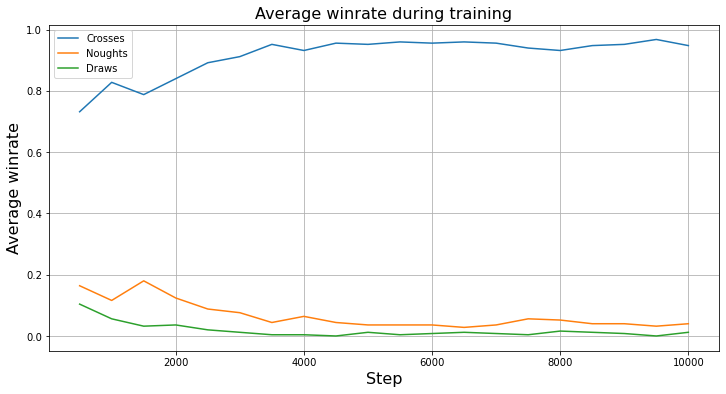

In [16]:
plot_history(crosses_history)

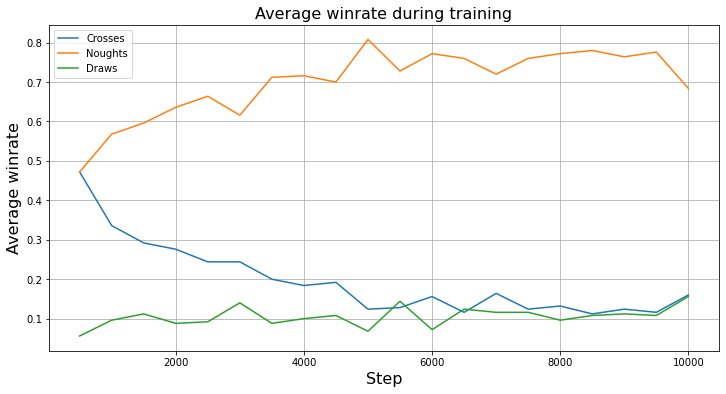

In [17]:
plot_history(noughts_history)

–°–æ—Ö—Ä–∞–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏, —á—Ç–æ–±—ã –ø–µ—Ä–µ–∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∏—Ö –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º:

In [18]:
ENV_3_Q_CROSSES = copy.deepcopy(policies[CROSSES])
ENV_3_Q_NOUGHTS = copy.deepcopy(policies[NOUGHTS])

2. –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –æ–±—É—á–∏—Ç—å —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∫—Ä–µ—Å—Ç–∏–∫–æ–≤ –∏ –Ω–æ–ª–∏–∫–æ–≤ –¥–ª—è –¥–æ—Å–∫–∏ 4—Ö4 –∏/–∏–ª–∏ 5—Ö5.

In [19]:
policies = {
    agent: EpsGreedyPolicy()
    for agent in AGENTS
}

crosses_history, noughts_history = q_learning(
    ENV_4, policies, num_episodes=50_000,
    gamma=0.8, eps_decay=48_000,
    evaluate_every=2_500, eval_window=1_500
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50000/50000 [01:30<00:00, 552.65it/s] 


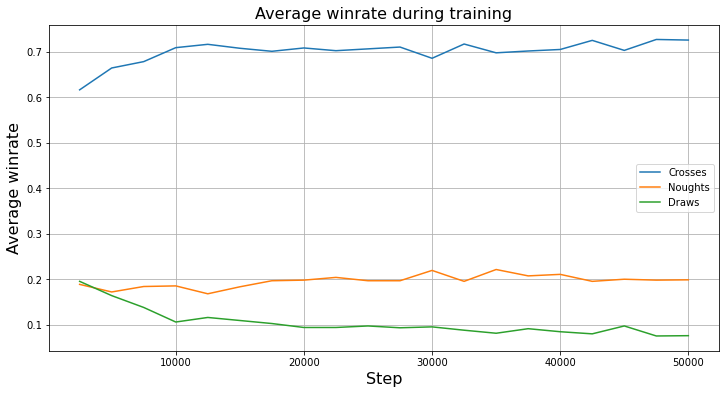

In [20]:
plot_history(crosses_history)

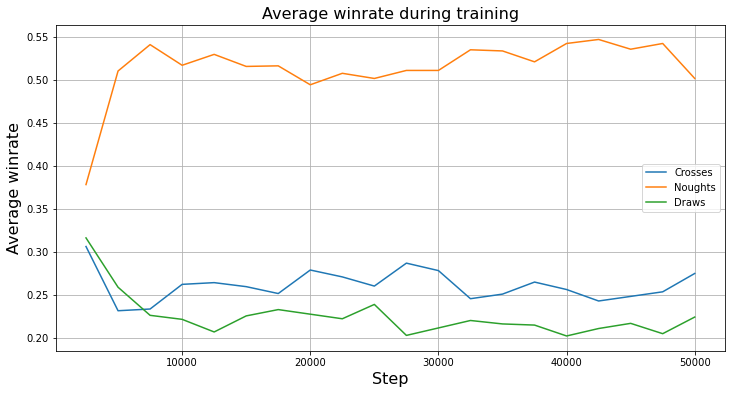

In [21]:
plot_history(noughts_history)

In [22]:
ENV_4_Q_CROSSES = copy.deepcopy(policies[CROSSES])
ENV_4_Q_NOUGHTS = copy.deepcopy(policies[NOUGHTS])

In [23]:
env = TicTacToe(n_rows=5, n_cols=5, n_win=5)

policies = {
    agent: EpsGreedyPolicy()
    for agent in AGENTS
}

crosses_history, noughts_history = q_learning(
    env, policies, num_episodes=100_000,
    gamma=0.8, eps_decay=95_000,
    evaluate_every=5_000, eval_window=2_500
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100000/100000 [05:46<00:00, 288.21it/s]


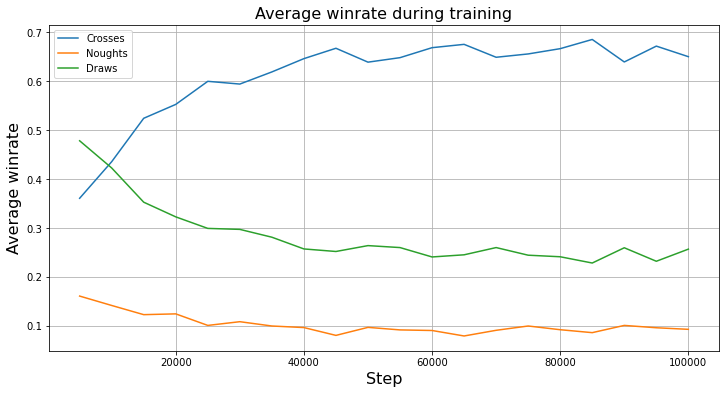

In [24]:
plot_history(crosses_history)

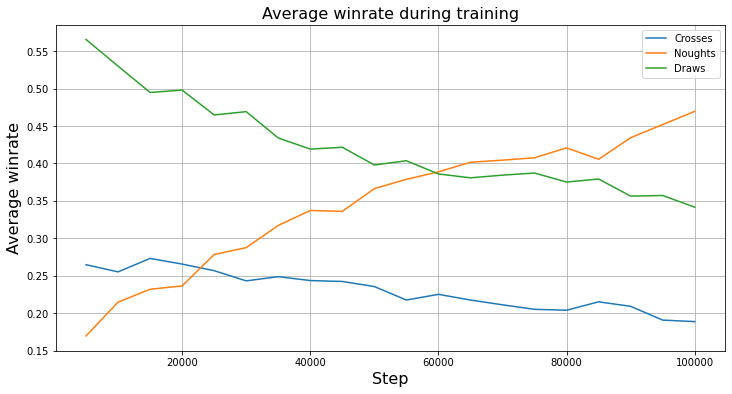

In [25]:
plot_history(noughts_history)

In [26]:
ENV_5_Q_CROSSES = copy.deepcopy(policies[CROSSES])
ENV_5_Q_NOUGHTS = copy.deepcopy(policies[NOUGHTS])

**Disclaimer:** –Ω–∞—á–∏–Ω–∞—è —Å –ø—É–Ω–∫—Ç–∞ 2, –∑–∞–¥–∞–Ω–∏—è –¥–ª—è –¥–æ—Å–æ–∫ —Ä–∞–∑–º–µ—Ä–∞ –±–æ–ª—å—à–µ 4—Ö4 –º–æ–≥—É—Ç –ø–æ—Ç—Ä–µ–±–æ–≤–∞—Ç—å –±–æ–ª—å—à–æ–≥–æ —Ç–µ—Ä–ø–µ–Ω–∏—è –∏–ª–∏ –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö –≤—ã—á–∏—Å–ª–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–∞—Ä–∞–ª–ª–µ–ª–∏–∑–∞—Ü–∏–∏). –ù–µ —Ö–æ—á—É –≤ —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –Ω–µ–ø—Ä–µ–º–µ–Ω–Ω–æ —Ç—Ä–µ–±–æ–≤–∞—Ç—å –Ω–∏ —Ç–æ–≥–æ –Ω–∏ –¥—Ä—É–≥–æ–≥–æ, —Ç–∞–∫ —á—Ç–æ –µ—Å–ª–∏ –Ω–µ –±—É–¥–µ—Ç –ø–æ–ª—É—á–∞—Ç—å—Å—è –¥–æ—É—á–∏—Ç—å –¥–æ –ø–æ–±–µ–¥–Ω—ã—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏–π ‚Äî –Ω–µ —Å—Ç—Ä–∞—à–Ω–æ, –Ω–æ –ø–æ–∫–∞–∂–∏—Ç–µ, —á—Ç–æ —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º —á—Ç–æ-—Ç–æ –≤—Å—ë-—Ç–∞–∫–∏ —É–ª—É—á—à–∞–µ—Ç—Å—è.

# –ß–∞—Å—Ç—å –≤—Ç–æ—Ä–∞—è: –¥–æ–±–∞–≤–∏–º –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π

–†–µ–∞–ª–∏–∑—É–π—Ç–µ –Ω–µ–π—Ä–æ–Ω–Ω—É—é —Å–µ—Ç—å –¥–ª—è –º–µ—Ç–æ–¥–∞ DQN –Ω–∞ –¥–æ—Å–∫–µ –¥–ª—è –∫—Ä–µ—Å—Ç–∏–∫–æ–≤-–Ω–æ–ª–∏–∫–æ–≤. –ù–µ –±—É–¥—É –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞—Ç—å —Ñ–∞–Ω—Ç–∞–∑–∏—é, –Ω–æ –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ —Å–≤—ë—Ä—Ç–∫–∏ 3—Ö3 –∑–¥–µ—Å—å –¥–æ–ª–∂–Ω—ã –Ω–µ–ø–ª–æ—Ö–æ —Ä–∞–±–æ—Ç–∞—Ç—å (–≤ —Ç–æ–º —á–∏—Å–ª–µ –æ–±–æ–±—â–∞—Ç—å—Å—è –Ω–∞ –¥–æ—Å–∫–∏ —Ä–∞–∑–º–µ—Ä–∞ –ø–æ–±–æ–ª—å—à–µ).

3. –†–µ–∞–ª–∏–∑—É–π—Ç–µ DQN —Å –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç—å—é, –æ–±—É—á–∏—Ç–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∫—Ä–µ—Å—Ç–∏–∫–æ–≤ –∏ –Ω–æ–ª–∏–∫–æ–≤. –ó–∞–º–µ—á–∞–Ω–∏–µ: —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, experience replay –ø–æ—Ç—Ä–µ–±—É–µ—Ç—Å—è —Å—Ä–∞–∑—É –∂–µ.

–†–µ—à–µ–Ω–∏—é –æ—á–µ–Ω—å –ø–æ—Å–ø–æ—Å–æ–±—Å—Ç–≤–æ–≤–∞–ª–∞ [—Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è DQN –¥–ª—è —Å—Ä–µ–¥—ã CartPole –æ—Ç PyTorch](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html).

In [27]:
class ReplayMemory:
    def __init__(self, capacity: int):
        self.memory = deque([], maxlen=capacity)

    def push(self, transition):
        """Save a transition"""
        self.memory.append(transition)

    def sample(self, batch_size: int = 64):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [28]:
class ConvNet(nn.Module):
    def __init__(self, output_dim: int,
                 hidden_dim: int = 16,
                 kernel_size: tuple = (3, 3)):
        super().__init__()
        self.conv_1 = nn.Conv2d(
            in_channels=3,
            out_channels=hidden_dim,
            kernel_size=kernel_size,
            padding=1
        )
        self.conv_2 = nn.Conv2d(
            in_channels=hidden_dim,
            out_channels=hidden_dim,
            kernel_size=kernel_size,
            padding=1
        )
        self.activation = nn.ReLU()
        self.linear = nn.Linear(
            in_features=hidden_dim * output_dim,
            out_features=output_dim
        )

    def forward(self, x):
        x = self.conv_1(x)
        x = self.activation(x)
        x = self.conv_2(x)
        x = self.activation(x)
        x = torch.flatten(x, 1)
        x = self.linear(x)
        return x

In [29]:
class DQN:
    def __init__(self, env, model: nn.Module, device: torch.device = torch.device("cpu")):
        self.env = env
        self.n_rows = self.env.n_rows
        self.n_cols = self.env.n_cols
        self.device = device

        self.models = {
            agent: model(output_dim=self.n_rows * self.n_cols).to(self.device)
            for agent in AGENTS
        }

        self.num_step = 0

    def board_to_tensor(self, board_hash):
        board = np.array([float(cell) for cell in board_hash]).reshape(
            (self.n_rows, self.n_cols)
        )
        crosses = torch.FloatTensor(board == 2)
        noughts = torch.FloatTensor(board == 0)
        empty_spaces = torch.FloatTensor(board == 1)
        return torch.stack((crosses, noughts, empty_spaces))

    def select_action(self, state, player, eps: float = 0.0):
        board_hash, _, _ = state
        board_tensor = self.board_to_tensor(board_hash).to(self.device)
        if random.random() >= eps:
            action_index = self.models[player](board_tensor.unsqueeze(0)).max(dim=1)[1].view(1, 1)
            return self.env.action_from_int(action_index)
        else:
            action_index = random.randrange(self.n_rows * self.n_cols)
            return self.env.action_from_int(action_index)

In [30]:
def optimization_step(dqn, memories, criterion, optimizers, cur_turn,
                      batch_size: int = 64, gamma: float = 0.8):
    if np.min([len(memories[cur_turn]), len(memories[-cur_turn])]) < batch_size:
        return

    # extract mini-batch from replay memory
    transitions = memories[cur_turn].sample(batch_size)
    batch_state, batch_action, batch_next_state, batch_reward = zip(*transitions)

    batch_state = Variable(torch.stack(batch_state).to(dqn.device))
    batch_action = Variable(torch.cat(batch_action).to(dqn.device))
    batch_reward = Variable(torch.cat(batch_reward).to(dqn.device))
    batch_next_state = Variable(torch.stack(batch_next_state).to(dqn.device))

    # calculate Q-function
    state_action_values  = dqn.models[cur_turn](batch_state).gather(1, batch_action).reshape([batch_size])

    # state value or 0 in case the state was final
    next_state_values = dqn.models[cur_turn](batch_next_state).max(1)[0].detach()

    # compute the expected Q values
    expected_state_action_values = gamma * next_state_values + batch_reward

    optimizers[cur_turn].zero_grad()
    loss = criterion(state_action_values, expected_state_action_values)
    loss.backward()
    for param in dqn.models[cur_turn].parameters():
        param.grad.data.clamp_(-1, 1)
    optimizers[cur_turn].step()


def dqn_training_step(dqn, criterion, optimizers, memories,
                      batch_size: int = 64, eps_init: float = 0.9,
                      eps_final: float = 0.01, eps_decay: int = 10_000,
                      gamma: float = 0.8):
    dqn.env.reset()
    previous_states = {
        agent: None
        for agent in AGENTS
    }
    previous_actions = {}
    state = dqn.env.getState()
    board_hash, _, cur_turn = state

    done = False
    while not done:
        board_tensor = dqn.board_to_tensor(board_hash).to(dqn.device)
        dqn.num_step += 1
        eps = eps_init + (eps_final - eps_init) * dqn.num_step / eps_decay
        with torch.no_grad():
            action = dqn.select_action(state, cur_turn, eps)

        action_index = torch.tensor(
            dqn.env.int_from_action(action),
            device=dqn.device,
            dtype=torch.long
        ).view(1, 1)
        previous_states[cur_turn] = board_tensor
        previous_actions[cur_turn] = action_index
        state, reward, done, _ = dqn.env.step(action)
        next_board_hash, _, cur_turn = state
        board_hash = next_board_hash
        next_board_tensor = dqn.board_to_tensor(next_board_hash)

        if reward == -10:
            transition = (board_tensor, action_index, next_board_tensor, torch.tensor([reward], dtype=torch.float32))
            memories[cur_turn].push(transition)
        else:
            if previous_states[cur_turn] is not None:
                if reward == -cur_turn: 
                    transition = (previous_states[-cur_turn], previous_actions[-cur_turn],
                                    next_board_tensor, torch.tensor([1.0], dtype=torch.float32))
                    memories[-cur_turn].push(transition)
                transition = (previous_states[cur_turn], previous_actions[cur_turn],
                                next_board_tensor, torch.tensor([reward * cur_turn], dtype=torch.float32))
                memories[cur_turn].push(transition)

        optimization_step(dqn, memories, criterion, optimizers, cur_turn, batch_size, gamma)


def train_dqn(dqn, num_epochs: int, learning_rate: float = 1e-4, batch_size: int = 64,
              weight_decay: float = 5e-4, memory_size: int = 50_000,
              eps_init: float = 0.9, eps_final: float = 0.01, eps_decay: int = 10_000,
              evaluate_every: int = 1000, eval_window: int = 500,
              show_progress: bool = False):
    crosses_history = {
        "indices": [],
        "crosses": [],
        "noughts": [],
        "draws": []
    }
    noughts_history = copy.deepcopy(crosses_history)
    memories = {
        agent: ReplayMemory(memory_size * dqn.env.n_rows * dqn.env.n_cols)
        for agent in AGENTS
    }
    criterion = nn.SmoothL1Loss()
    optimizers = {
        agent: optim.Adam(
            dqn.models[agent].parameters(),
            lr=learning_rate,
            weight_decay=weight_decay
        ) for agent in AGENTS
    }

    for i in tqdm(
        range(num_epochs),
        desc=f"Training on {dqn.device}",
        disable=not show_progress
    ):
        dqn_training_step(dqn, criterion, optimizers, memories,
                          batch_size, eps_init, eps_final, eps_decay)
        if (i + 1) % evaluate_every == 0:
            history = test_performance(
                dqn.env,
                policies={CROSSES: dqn, NOUGHTS: RandomPolicy()},
                num_experiments=eval_window,
                show_progress=False
            )
            crosses_history["indices"].append(i + 1)
            crosses_history["crosses"].append(history["crosses"][-1])
            crosses_history["noughts"].append(history["noughts"][-1])
            crosses_history["draws"].append(history["draws"][-1])

            history = test_performance(
                dqn.env,
                policies={CROSSES: RandomPolicy(), NOUGHTS: dqn},
                num_experiments=eval_window,
                show_progress=False
            )
            noughts_history["indices"].append(i + 1)
            noughts_history["crosses"].append(history["crosses"][-1])
            noughts_history["noughts"].append(history["noughts"][-1])
            noughts_history["draws"].append(history["draws"][-1])
    
    return crosses_history, noughts_history

In [31]:
dqn = DQN(env=ENV_3, model=ConvNet, device=device)

crosses_history, noughts_history = train_dqn(
    dqn, num_epochs=10_000,
    eps_decay=9_000,
    evaluate_every=500,
    eval_window=250,
    show_progress=True
)

Training on cuda: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [05:17<00:00, 31.53it/s]


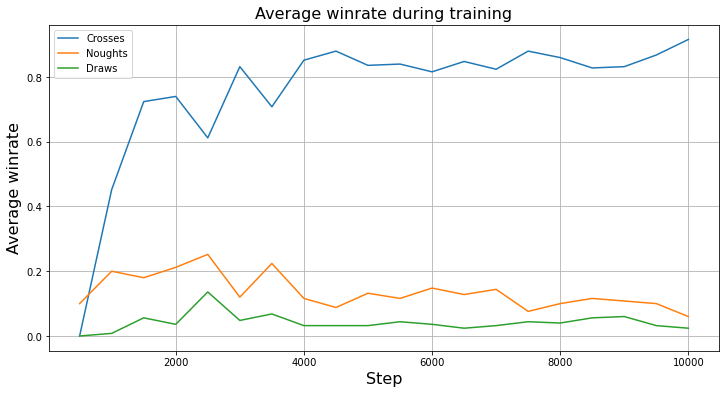

In [32]:
plot_history(crosses_history)

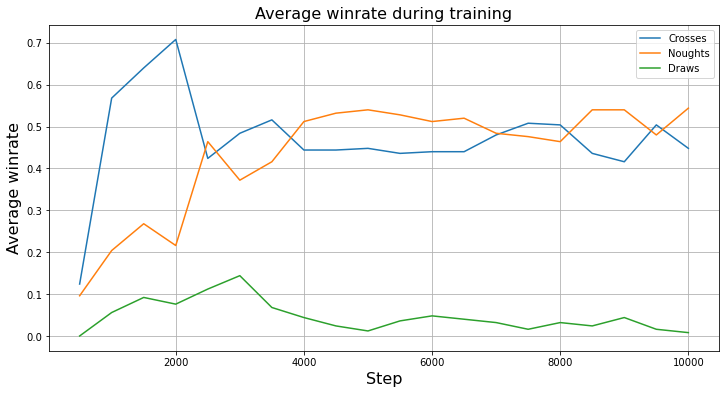

In [33]:
plot_history(noughts_history)

In [34]:
ENV_3_DQN = copy.deepcopy(dqn)

In [35]:
dqn = DQN(env=ENV_4, model=ConvNet, device=device)

crosses_history, noughts_history = train_dqn(
    dqn, num_epochs=15_000,
    eps_decay=13_500,
    evaluate_every=750,
    eval_window=400,
    show_progress=True
)

Training on cuda: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15000/15000 [11:32<00:00, 21.66it/s]


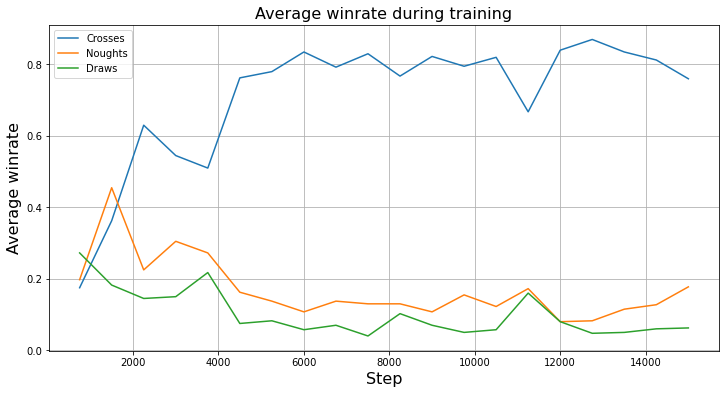

In [36]:
plot_history(crosses_history)

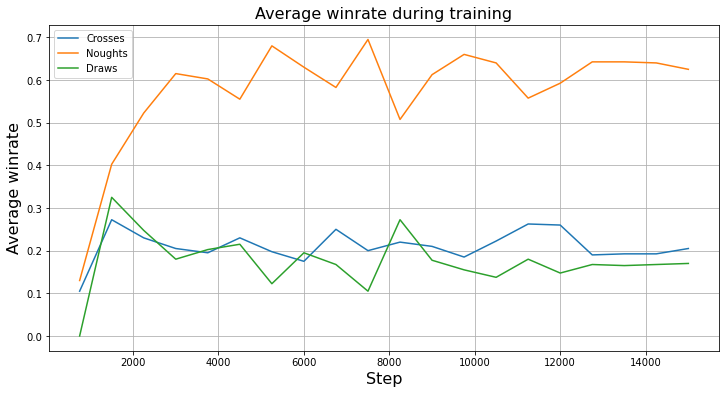

In [37]:
plot_history(noughts_history)

In [38]:
ENV_4_DQN = copy.deepcopy(dqn)

In [39]:
dqn = DQN(env=ENV_5, model=ConvNet, device=device)

crosses_history, noughts_history = train_dqn(
    dqn, num_epochs=20_000,
    eps_decay=18_000,
    evaluate_every=1_000,
    eval_window=500,
    show_progress=True
)

Training on cuda: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [26:31<00:00, 12.57it/s]


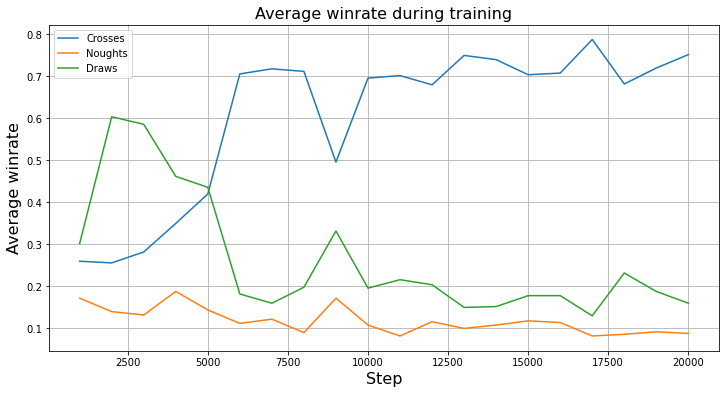

In [40]:
plot_history(crosses_history)

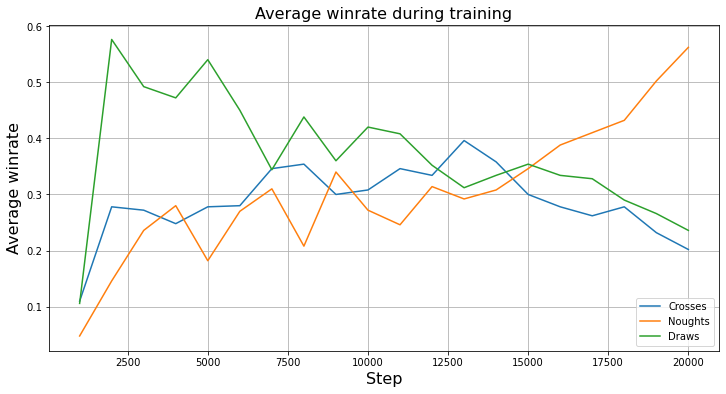

In [41]:
plot_history(noughts_history)

In [42]:
ENV_5_DQN = copy.deepcopy(dqn)

4. –†–µ–∞–ª–∏–∑—É–π—Ç–µ Double DQN –∏/–∏–ª–∏ Dueling DQN.

In [43]:
class DuelingConvNet(nn.Module):
    def __init__(self, output_dim: int,
                 hidden_dim: int = 16,
                 kernel_size: tuple = (3, 3)):
        super().__init__()
        self.conv_1 = nn.Conv2d(
            in_channels=3,
            out_channels=hidden_dim * 2,
            kernel_size=kernel_size,
            padding=1
        )
        self.conv_2 = nn.Conv2d(
            in_channels=hidden_dim * 2,
            out_channels=hidden_dim * 2,
            kernel_size=kernel_size,
            padding=1
        )
        self.activation = nn.ReLU()
        self.linear = nn.Linear(
            in_features=hidden_dim * output_dim * 2,
            out_features=hidden_dim * output_dim
        )
        self.linear_action = nn.Linear(
            in_features=hidden_dim * output_dim,
            out_features=output_dim
        )
        self.linear_value = nn.Linear(
            in_features=hidden_dim * output_dim,
            out_features=1
        )

    def forward(self, x):
        x = self.conv_1(x)
        x = self.activation(x)
        x = self.conv_2(x)
        x = self.activation(x)
        x = torch.flatten(x, 1)
        x = self.linear(x)
        x = self.activation(x)
        value = self.linear_value(x)
        action = self.linear_action(x)
        x = value + (action - action.mean(dim=1, keepdim=True))
        return x

In [44]:
dqn = DQN(env=ENV_3, model=DuelingConvNet, device=device)

crosses_history, noughts_history = train_dqn(
    dqn, num_epochs=10_000,
    eps_decay=9_000,
    evaluate_every=500,
    eval_window=250,
    show_progress=True
)

Training on cuda: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [05:49<00:00, 28.62it/s]


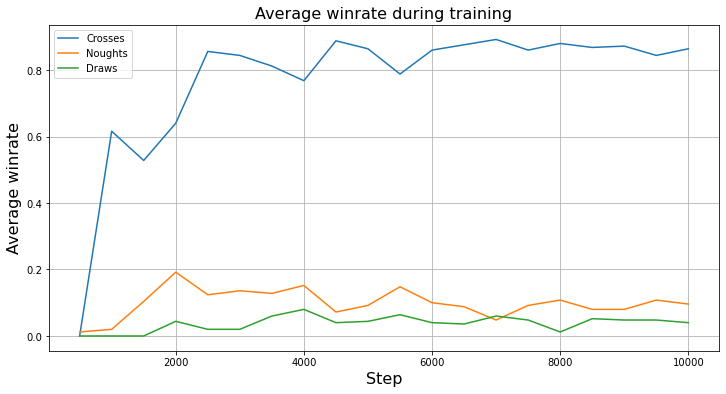

In [45]:
plot_history(crosses_history)

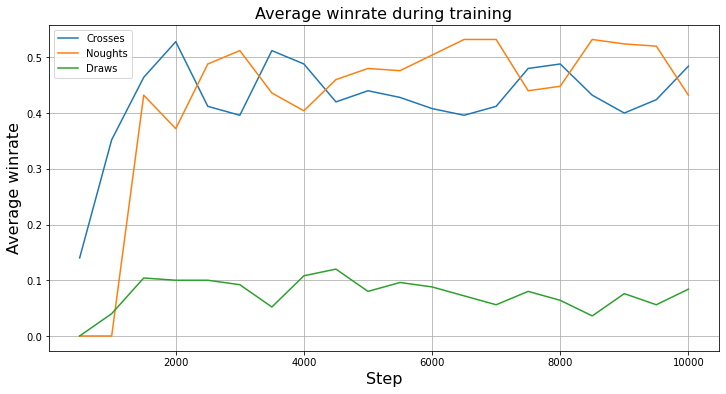

In [46]:
plot_history(noughts_history)

In [47]:
ENV_3_DUELING_DQN = copy.deepcopy(dqn)

In [48]:
dqn = DQN(env=ENV_4, model=DuelingConvNet, device=device)

crosses_history, noughts_history = train_dqn(
    dqn, num_epochs=15_000,
    eps_decay=13_500,
    evaluate_every=750,
    eval_window=400,
    show_progress=True
)

Training on cuda: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 15000/15000 [15:03<00:00, 16.60it/s]


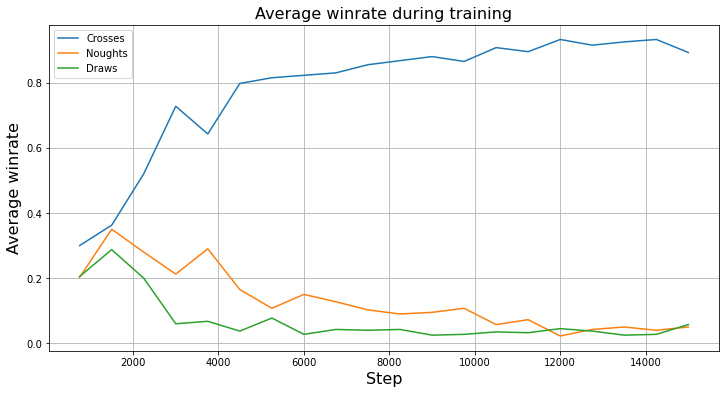

In [49]:
plot_history(crosses_history)

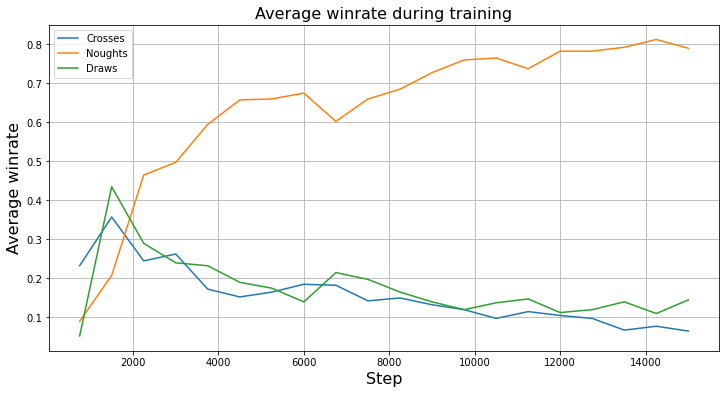

In [50]:
plot_history(noughts_history)

In [51]:
ENV_4_DUELING_DQN = copy.deepcopy(dqn)

In [52]:
dqn = DQN(env=ENV_5, model=DuelingConvNet, device=device)

crosses_history, noughts_history = train_dqn(
    dqn, num_epochs=20_000,
    eps_decay=18_000,
    evaluate_every=1_000,
    eval_window=500,
    show_progress=True
)

Training on cuda: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [37:01<00:00,  9.00it/s]


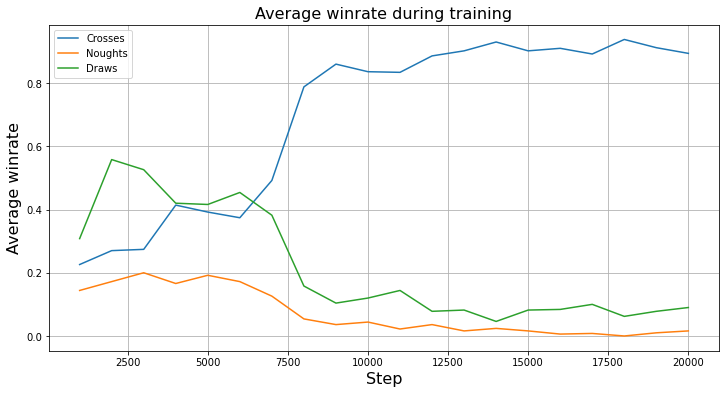

In [53]:
plot_history(crosses_history)

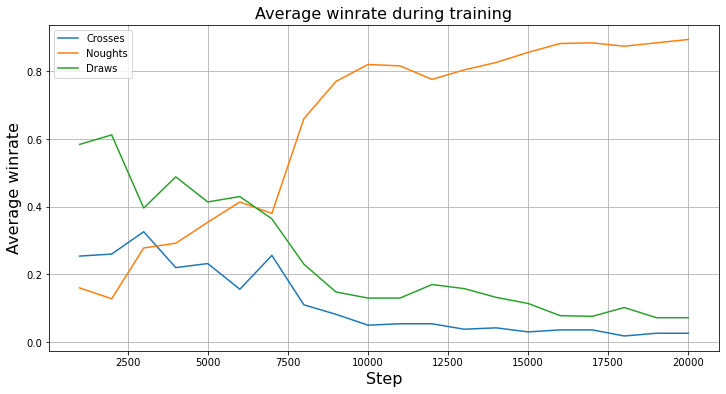

In [54]:
plot_history(noughts_history)

In [55]:
ENV_5_DUELING_DQN = copy.deepcopy(dqn)

# –ß–∞—Å—Ç—å —Ç—Ä–µ—Ç—å—è: —Ä–∞—Å—à–∏—Ä–∏–º –∏ —É–≥–ª—É–±–∏–º –ø–æ–∏—Å–∫

–ö—Ä–µ—Å—Ç–∏–∫–∏-–Ω–æ–ª–∏–∫–∏ ‚Äî —ç—Ç–æ, –∫–æ–Ω–µ—á–Ω–æ, –¥–∞–ª–µ–∫–æ –Ω–µ –≥–æ, –∏ –æ–±—ã—á–Ω—ã–π –∞–ª—å—Ñ–∞-–±–µ—Ç–∞ –ø–æ–∏—Å–∫ —Å –æ—Ç—Å–µ—á–µ–Ω–∏–µ–º –∑–¥–µ—Å—å –Ω–∞–≤–µ—Ä–Ω—è–∫–∞ –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –∏–¥–µ–∞–ª—å–Ω–æ –≤–ø–ª–æ—Ç—å –¥–æ –¥–æ–≤–æ–ª—å–Ω–æ –±–æ–ª—å—à–∏—Ö –¥–æ—Å–æ–∫. –û–¥–Ω–∞–∫–æ –º—ã –≤—Å—ë-—Ç–∞–∫–∏ –¥–ª—è —ç—Ç–æ–≥–æ —É—á–µ–±–Ω–æ–≥–æ –∑–∞–¥–∞–Ω–∏—è –±—É–¥–µ–º —Ä–µ–∞–ª–∏–∑–æ–≤—ã–≤–∞—Ç—å –±–æ–ª–µ–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã–π –º–µ—Ç–æ–¥ MCTS ‚Äî –∑–∞–æ–¥–Ω–æ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –ø–æ–ª—É—á–∏—Ç—Å—è –∏ —É–ø—Ä–∞–∂–Ω–µ–Ω–∏–µ –Ω–∞ –º–Ω–æ–≥–æ—Ä—É–∫–∏—Ö –±–∞–Ω–¥–∏—Ç–æ–≤.

5. –†–µ–∞–ª–∏–∑—É–π—Ç–µ rollouts —Å–æ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–µ–π –∏ (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ) rollouts —Å –Ω–µ—Å–ª—É—á–∞–π–Ω–æ–π, –Ω–æ –ø—Ä–æ—Å—Ç–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–µ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, –æ—Å–Ω–æ–≤–∞–Ω–Ω–æ–π –Ω–∞ –¥–æ–ø–æ–ª–Ω–µ–Ω–∏–∏ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–∞—Ç—Ç–µ—Ä–Ω–æ–≤ –∏–ª–∏ –Ω–∞ Q-—Ñ—É–Ω–∫—Ü–∏–∏, –∫–æ—Ç–æ—Ä–∞—è —É –≤–∞—Å –ø–æ–ª—É—á–∏–ª–∞—Å—å –≤ –ø–µ—Ä–≤–æ–º –ø—É–Ω–∫—Ç–µ).

–í —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ rollouts –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å—Ç—Ä–∞—Ç–µ–≥–∏—é –∞–≥–µ–Ω—Ç–∞ –ø—Ä–∏ —Ö–æ–¥–µ –∞–≥–µ–Ω—Ç–∞ –∏ —Å–ª—É—á–∞–π–Ω—É—é —Å—Ç—Ä–∞—Ç–µ–≥–∏—é –≤ –ø—Ä–æ—Ç–∏–≤–Ω–æ–º —Å–ª—É—á–∞–µ.

In [56]:
def rollout(env, action, policies, num_rollouts: int = 40):
    total_reward = 0
    for _ in range(num_rollouts):
        env_copy = copy.deepcopy(env)
        state, reward, done, _ = env_copy.step(action)
        _, empty_spaces, cur_turn = state

        while not done:
            action_index = policies[cur_turn].select_action(state, cur_turn)
            state, reward, done, _ = env_copy.step(empty_spaces[action_index])
            _, empty_spaces, cur_turn = state

        total_reward += reward

    return total_reward / num_rollouts

In [57]:
def run_episode_with_rollouts(env, policies, num_rollouts: int = 40):
    random_pi = RandomPolicy()
    env.reset()
    state = env.getState()
    _, empty_spaces, cur_turn = state
    reward = 0

    done = False
    while not done:
        if policies[cur_turn] is not None:
            best_reward = -10
            action_index = 0
            for i, action in enumerate(empty_spaces):
                avg_reward = cur_turn * rollout(
                    env, action,
                    {cur_turn: policies[cur_turn], -cur_turn: random_pi},
                    num_rollouts=num_rollouts
                )
                if avg_reward > best_reward:
                    best_reward = avg_reward
                    action_index = i
        else:
            action_index = random_pi.select_action(state)
        state, reward, done, _ = env.step(empty_spaces[action_index])
        _, empty_spaces, cur_turn = state

    return reward

In [58]:
def test_rollouts(env, policies, num_episodes: int = 1,
                  num_rollouts: int = 40, show_progress: bool = True):
    crosses_wins = 0
    noughts_wins = 0
    for _ in tqdm(range(num_episodes), disable=not show_progress):
        reward = run_episode_with_rollouts(env, policies, num_rollouts)
        crosses_wins += int(reward == CROSSES)
        noughts_wins += int(reward == NOUGHTS)

    print(f"Average winrate of crosses: {crosses_wins / num_episodes:.4f}")
    print(f"Average winrate of noughts: {noughts_wins / num_episodes:.4f}")

–î–ª—è –ø–æ–ª—è 3 –Ω–∞ 3:

In [59]:
test_rollouts(
    ENV_3,
    policies={CROSSES: RandomPolicy(), NOUGHTS: None},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:26<00:00,  3.79it/s]

Average winrate of crosses: 0.9900
Average winrate of noughts: 0.0000


In [60]:
test_rollouts(
    ENV_3,
    policies={CROSSES: None, NOUGHTS: RandomPolicy()},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:20<00:00,  5.00it/s]

Average winrate of crosses: 0.0500
Average winrate of noughts: 0.8700


In [62]:
test_rollouts(
    ENV_3,
    policies={CROSSES: ENV_3_Q_CROSSES, NOUGHTS: None},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:21<00:00,  4.57it/s]

Average winrate of crosses: 1.0000
Average winrate of noughts: 0.0000


In [63]:
test_rollouts(
    ENV_3,
    policies={CROSSES: None, NOUGHTS: ENV_3_Q_NOUGHTS},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:18<00:00,  5.34it/s]

Average winrate of crosses: 0.0500
Average winrate of noughts: 0.9100


–î–ª—è –ø–æ–ª—è 4 –Ω–∞ 4:

In [64]:
test_rollouts(
    ENV_4,
    policies={CROSSES: RandomPolicy(), NOUGHTS: None},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:39<00:00,  1.60s/it]

Average winrate of crosses: 0.9600
Average winrate of noughts: 0.0000


In [65]:
test_rollouts(
    ENV_4,
    policies={CROSSES: None, NOUGHTS: RandomPolicy()},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:16<00:00,  1.37s/it]

Average winrate of crosses: 0.0000
Average winrate of noughts: 0.9400


In [67]:
test_rollouts(
    ENV_4,
    policies={CROSSES: ENV_4_Q_CROSSES, NOUGHTS: None},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:15<00:00,  1.36s/it]

Average winrate of crosses: 0.9500
Average winrate of noughts: 0.0100


In [68]:
test_rollouts(
    ENV_4,
    policies={CROSSES: None, NOUGHTS: ENV_4_Q_NOUGHTS},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:07<00:00,  1.28s/it]

Average winrate of crosses: 0.0000
Average winrate of noughts: 0.9100


–î–ª—è –ø–æ–ª—è 5 –Ω–∞ 5:

In [69]:
test_rollouts(
    ENV_5,
    policies={CROSSES: RandomPolicy(), NOUGHTS: None},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [11:34<00:00,  6.95s/it]

Average winrate of crosses: 0.9000
Average winrate of noughts: 0.0000


In [70]:
test_rollouts(
    ENV_5,
    policies={CROSSES: None, NOUGHTS: RandomPolicy()},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [10:31<00:00,  6.32s/it]

Average winrate of crosses: 0.0000
Average winrate of noughts: 0.8900


In [71]:
test_rollouts(
    ENV_5,
    policies={CROSSES: ENV_5_Q_CROSSES, NOUGHTS: None},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [10:17<00:00,  6.18s/it]

Average winrate of crosses: 0.9400
Average winrate of noughts: 0.0000


In [72]:
test_rollouts(
    ENV_5,
    policies={CROSSES: None, NOUGHTS: ENV_5_Q_NOUGHTS},
    num_episodes=100
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [10:08<00:00,  6.08s/it]

Average winrate of crosses: 0.0000
Average winrate of noughts: 0.9300


–ö–∞–∫ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ rollouts –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –ø–æ–≤—ã—Å–∏—Ç—å —à–∞–Ω—Å—ã –Ω–∞ –ø–æ–±–µ–¥—É –ø—Ä–∏ –∏–≥—Ä–µ –ø—Ä–æ—Ç–∏–≤ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏.

6. –†–µ–∞–ª–∏–∑—É–π—Ç–µ MCTS-–ø–æ–∏—Å–∫ —Å —ç—Ç–∏–º–∏ rollouts –¥–ª—è –∫—Ä–µ—Å—Ç–∏–∫–æ–≤-–Ω–æ–ª–∏–∫–æ–≤ –Ω–∞ –¥–æ—Å–∫–∞—Ö —Ä–∞–∑–Ω–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞, —Å—Ä–∞–≤–Ω–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –º–µ–∂–¥—É —Å–æ–±–æ–π –∏ —Å–æ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º–∏, –æ–±—É—á–µ–Ω–Ω—ã–º–∏ –≤ –ø–µ—Ä–≤—ã—Ö –¥–≤—É—Ö —á–∞—Å—Ç—è—Ö.

In [73]:
class MctsNode:
    def __init__(self, env, parent=None):
        self.env = copy.deepcopy(env)
        self.is_terminal = self.env.isTerminal() is not None
        self.parent = parent
        self.children = []
        self.num_visits = 0
        self.reward = 0
        self.new_actions = list(self.env.getEmptySpaces())

    def select_best_child(self, exploration_coef: float = 1.0):
        children_scores = [
            child.reward / child.num_visits
            + exploration_coef * np.sqrt((np.log(self.num_visits) / child.num_visits))
            for child in self.children
        ]
        return np.argmax(children_scores)

    def expand(self):
        action = self.new_actions.pop(0)

        next_env = copy.deepcopy(self.env)
        next_env.step(action)

        child_node = MctsNode(next_env, parent=self)
        self.children.append(child_node)

        return child_node

    def rollout(self):
        rollout_env = copy.deepcopy(self.env)

        reward = rollout_env.isTerminal()
        empty_spaces = rollout_env.getEmptySpaces()

        done = self.is_terminal
        while not done:
            action = random.choice(empty_spaces)
            (_, empty_spaces, _), reward, done, _ = rollout_env.step(action)
        return reward * self.env.curTurn

    def backprop(self, reward):
        self.num_visits += 1
        self.reward -= reward
        if self.parent:
            self.parent.backprop(-reward)

In [74]:
class MctsPolicy:
    def __init__(self, env, num_simulations: int = 100):
        self.env = env
        self.num_simulations = num_simulations

    def select_action(self, state, player: int = None, eps: float = 0.0):
        tree_root = MctsNode(self.env)

        for _ in range(self.num_simulations):
            node = tree_root
            while not node.is_terminal:
                if len(node.new_actions) > 0:
                    node = node.expand()
                else:
                    node = node.children[node.select_best_child(exploration_coef=1.4)]
            reward = node.rollout()
            node.backprop(reward)
        return tree_root.select_best_child(exploration_coef=0)

–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Å–µ—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏–π –º–µ–∂–¥—É —Å–æ–±–æ–π –≤—ã–Ω–µ—Å–µ–º –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π –±–ª–æ–∫. –î–ª—è –∫–∞–∂–¥–æ–π –¥–æ—Å–∫–∏ –≤ –∫–æ–Ω—Ü–µ –µ—Å—Ç—å —Å–≤–æ–¥–Ω–∞—è —Ç–∞–±–ª–∏—á–∫–∞. –ü–æ–µ—Ö–∞–ª–∏!

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

## –î–æ—Å–∫–∞ 3 –Ω–∞ 3

In [75]:
_ = test_performance(
    ENV_3,
    {CROSSES: RandomPolicy(), NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 1895.03it/s]

Average crosses winrate: 0.5600
Average noughts winrate: 0.3200


In [76]:
_ = test_performance(
    ENV_3,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_3_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 2013.23it/s]

Average crosses winrate: 0.1200
Average noughts winrate: 0.7200


In [77]:
_ = test_performance(
    ENV_3,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_3_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 371.31it/s]

Average crosses winrate: 0.4600
Average noughts winrate: 0.5300


In [78]:
_ = test_performance(
    ENV_3,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_3_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 287.71it/s]

Average crosses winrate: 0.4800
Average noughts winrate: 0.4300


In [79]:
_ = test_performance(
    ENV_3,
    {CROSSES: RandomPolicy(), NOUGHTS: MctsPolicy(ENV_3, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:08<00:00, 11.96it/s]

Average crosses winrate: 0.0600
Average noughts winrate: 0.8700


In [80]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_Q_CROSSES, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 2419.40it/s]

Average crosses winrate: 0.8900
Average noughts winrate: 0.0900


In [81]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_Q_CROSSES, NOUGHTS: ENV_3_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 2203.78it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [82]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_Q_CROSSES, NOUGHTS: ENV_3_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 442.45it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [83]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_Q_CROSSES, NOUGHTS: ENV_3_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 520.31it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [84]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_Q_CROSSES, NOUGHTS: MctsPolicy(ENV_3, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:08<00:00, 11.23it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [85]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DQN, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 364.31it/s]

Average crosses winrate: 0.8900
Average noughts winrate: 0.0900


In [86]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DQN, NOUGHTS: ENV_3_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 470.13it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [87]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DQN, NOUGHTS: ENV_3_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 270.20it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [88]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DQN, NOUGHTS: ENV_3_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 200.12it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [89]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DQN, NOUGHTS: MctsPolicy(ENV_3, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:08<00:00, 11.47it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 0.0000


In [90]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DUELING_DQN, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 287.01it/s]

Average crosses winrate: 0.9300
Average noughts winrate: 0.0500


In [91]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DUELING_DQN, NOUGHTS: ENV_3_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 261.46it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [92]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DUELING_DQN, NOUGHTS: ENV_3_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 277.47it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [93]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DUELING_DQN, NOUGHTS: ENV_3_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 246.73it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [94]:
_ = test_performance(
    ENV_3,
    {CROSSES: ENV_3_DUELING_DQN, NOUGHTS: MctsPolicy(ENV_3, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:09<00:00, 10.87it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [95]:
_ = test_performance(
    ENV_3,
    {CROSSES: MctsPolicy(ENV_3, num_simulations=50), NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:10<00:00,  9.91it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [96]:
_ = test_performance(
    ENV_3,
    {CROSSES: MctsPolicy(ENV_3, num_simulations=50), NOUGHTS: ENV_3_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:11<00:00,  8.46it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 0.0000


In [97]:
_ = test_performance(
    ENV_3,
    {CROSSES: MctsPolicy(ENV_3, num_simulations=50), NOUGHTS: ENV_3_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:09<00:00, 10.14it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [98]:
_ = test_performance(
    ENV_3,
    {CROSSES: MctsPolicy(ENV_3, num_simulations=50), NOUGHTS: ENV_3_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:09<00:00, 10.33it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [99]:
_ = test_performance(
    ENV_3,
    {CROSSES: MctsPolicy(ENV_3, num_simulations=50), NOUGHTS: MctsPolicy(ENV_3, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:19<00:00,  5.16it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


|                  | RandomPolicy    | Q-learning      | DQN             | DuelingDQN      | MCTS            | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, —Å–µ–∫ |
|------------------|:---------------:|:---------------:|:---------------:|:---------------:|:---------------:|:-------------------:|
| **RandomPolicy** | 56% / 32% | 12% / 72% | 46% / 53% | 48% / 43% | 6% / 87% | N/A                 |
| **Q-learning**   | 89% / 9% | 0% / 100% | 0% / 100% | 100% / 0% | 0% / 100% | 4                   |
| **DQN**          | 89% / 9% | 0% / 100% | 0% / 100% | 100% / 0% | 0% / 0% | 160                 |
| **DuelingDQN**   | 93% / 5% | 100% / 0% | 100% / 0% | 100% / 0% | 0% / 100% | 175                 |
| **MCTS**         | 100% / 0% | 0% / 100% | 100% / 0% | 100% / 0% | 100% / 0% | N/A                 |

–ß—Ç–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, –≥–ª—è–¥—è –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –¥–æ—Å–∫–∏ 3 –Ω–∞ 3:
* –≤—Å–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ —è–≤–Ω–æ –Ω–µ–¥–æ—É—á–∏–ª–∏—Å—å: –ø—Ä–∏ –ø—Ä–∞–≤–∏–ª—å–Ω—ã—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏—è—Ö –æ–±–æ–∏—Ö –∞–≥–µ–Ω—Ç–æ–≤ –≤—Å—ë, –Ω–∞ —á—Ç–æ —Å—Ç–æ–∏—Ç –Ω–∞–¥–µ—è—Ç—å—Å—è –Ω–æ–ª–∏–∫–∞–º ‚Äî —ç—Ç–æ –Ω–∏—á—å—è, –Ω–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–π –ø–µ—Ä–µ–≤–µ—Å —á–∏—Å–ª–∞ –ø–æ–±–µ–¥ –Ω–æ–ª–∏–∫–æ–≤ –¥–ª—è –º–Ω–æ–≥–∏—Ö –ø—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–π;
* –ø—Ä–æ—Ç–∏–≤ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –ø—Ä–∏ –∏–≥—Ä–µ –∫–∞–∫ –∑–∞ –∫—Ä–µ—Å—Ç–∏–∫–∏ (–ø–µ—Ä–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü), —Ç–∞–∫ –∏ –∑–∞ –Ω–æ–ª–∏–∫–∏ (–ø–µ—Ä–≤–∞—è —Å—Ç—Ä–æ–∫–∞) –ª—É—á—à–µ –≤—Å–µ–≥–æ —Å–µ–±—è –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç `Q-learning` –∏ `MCTS`. –ü—Ä–∏ —ç—Ç–æ–º `Q-learning`-–∫—Ä–µ—Å—Ç–∏–∫–∏ –ø—Ä–æ–∏–≥—Ä—ã–≤–∞—é—Ç —Ç–æ–ª—å–∫–æ `MCTS`-–Ω–æ–ª–∏–∫–∞–º, –∞ `MCTS`-–∫—Ä–µ—Å—Ç–∏–∫–∏ ‚Äî —Ç–æ–ª—å–∫–æ `Q-learning`-–Ω–æ–ª–∏–∫–∞–º; üòÖ
* `MCTS` —Å–æ–±–∏—Ä–∞–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è–º –ø—Ä—è–º–æ –≤–æ –≤—Ä–µ–º—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏–π, –æ–±—É—á–∞–µ–º—ã—Ö –ø–µ—Ä–µ–¥ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ–º. –≠—Ç–æ –±—ã–ª–æ —Å–¥–µ–ª–∞–Ω–æ –æ—Ç—á–∞—Å—Ç–∏ —É–º—ã—à–ª–µ–Ω–Ω–æ: –Ω–∏—á—Ç–æ –Ω–µ –º–µ—à–∞–µ—Ç —Ç–æ—á–Ω–æ —Ç–∞–∫–∂–µ –ø—Ä–µ–¥–æ–±—É—á–∏—Ç—å `MCTS`, –Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –±—ã–ª–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫ –±—ã—Å—Ç—Ä–æ –∏ –∫–∞–∫ —Ö–æ—Ä–æ—à–æ –∞–ª–≥–æ—Ä–∏—Ç–º –∞–¥–∞–ø—Ç–∏—Ä—É–µ—Ç—Å—è "–Ω–∞ –ª–µ—Ç—É" –≤ –±–æ–µ–≤—ã—Ö —É—Å–ª–æ–≤–∏—è—Ö.

## –î–æ—Å–∫–∞ 4 –Ω–∞ 4

In [100]:
_ = test_performance(
    ENV_4,
    {CROSSES: RandomPolicy(), NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 1011.54it/s]

Average crosses winrate: 0.4100
Average noughts winrate: 0.2200


In [101]:
_ = test_performance(
    ENV_4,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_4_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 1055.53it/s]

Average crosses winrate: 0.2300
Average noughts winrate: 0.5400


In [102]:
_ = test_performance(
    ENV_4,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_4_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 210.50it/s]

Average crosses winrate: 0.2300
Average noughts winrate: 0.5600


In [103]:
_ = test_performance(
    ENV_4,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_4_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 201.99it/s]

Average crosses winrate: 0.0500
Average noughts winrate: 0.7700


In [104]:
_ = test_performance(
    ENV_4,
    {CROSSES: RandomPolicy(), NOUGHTS: MctsPolicy(ENV_4, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:35<00:00,  2.85it/s]

Average crosses winrate: 0.0100
Average noughts winrate: 0.8100


In [105]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_Q_CROSSES, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 1068.17it/s]

Average crosses winrate: 0.7000
Average noughts winrate: 0.2700


In [106]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_Q_CROSSES, NOUGHTS: ENV_4_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 1424.91it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [107]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_Q_CROSSES, NOUGHTS: ENV_4_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 243.85it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [108]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_Q_CROSSES, NOUGHTS: ENV_4_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 254.06it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [109]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_Q_CROSSES, NOUGHTS: MctsPolicy(ENV_4, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:26<00:00,  3.82it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [110]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DQN, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 229.55it/s]

Average crosses winrate: 0.7200
Average noughts winrate: 0.2200


In [111]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DQN, NOUGHTS: ENV_4_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 373.21it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [112]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DQN, NOUGHTS: ENV_4_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 140.48it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [113]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DQN, NOUGHTS: ENV_4_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 173.98it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [114]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DQN, NOUGHTS: MctsPolicy(ENV_4, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:32<00:00,  3.08it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [115]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DUELING_DQN, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 181.40it/s]

Average crosses winrate: 0.8800
Average noughts winrate: 0.0300


In [116]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DUELING_DQN, NOUGHTS: ENV_4_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 218.02it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [117]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DUELING_DQN, NOUGHTS: ENV_4_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 200.39it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [118]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DUELING_DQN, NOUGHTS: ENV_4_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 170.35it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [119]:
_ = test_performance(
    ENV_4,
    {CROSSES: ENV_4_DUELING_DQN, NOUGHTS: MctsPolicy(ENV_4, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:44<00:00,  2.27it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [120]:
_ = test_performance(
    ENV_4,
    {CROSSES: MctsPolicy(ENV_4, num_simulations=50), NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:36<00:00,  2.73it/s]

Average crosses winrate: 0.9500
Average noughts winrate: 0.0100


In [121]:
_ = test_performance(
    ENV_4,
    {CROSSES: MctsPolicy(ENV_4, num_simulations=50), NOUGHTS: ENV_4_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:35<00:00,  2.82it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [122]:
_ = test_performance(
    ENV_4,
    {CROSSES: MctsPolicy(ENV_4, num_simulations=50), NOUGHTS: ENV_4_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:30<00:00,  3.28it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [123]:
_ = test_performance(
    ENV_4,
    {CROSSES: MctsPolicy(ENV_4, num_simulations=50), NOUGHTS: ENV_4_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:49<00:00,  2.04it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [124]:
_ = test_performance(
    ENV_4,
    {CROSSES: MctsPolicy(ENV_4, num_simulations=50), NOUGHTS: MctsPolicy(ENV_4, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:28<00:00,  1.13it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


|                  | RandomPolicy    | Q-learning      | DQN             | DuelingDQN      | MCTS            | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, —Å–µ–∫ |
|------------------|:---------------:|:---------------:|:---------------:|:---------------:|:---------------:|:-------------------:|
| **RandomPolicy** | 41% / 22% | 23% / 54% | 23% / 56% | 5% / 77% | 1% / 81% | N/A                 |
| **Q-learning**   | 70% / 27% | 0% / 100% | 0% / 100% | 0% / 100% | 100% / 0% | 45                  |
| **DQN**          | 72% / 22% | 0% / 100% | 0% / 100% | 0% / 100% | 0% / 100% | 350                 |
| **DuelingDQN**   | 88% / 3% | 100% / 0% | 100% / 0% | 100% / 0% | 0% / 100% | 450                 |
| **MCTS**         | 95% / 1% | 0% / 100% | 100% / 0% | 0% / 100% | 0% / 100% | N/A                 |

–í –æ—Ç–ª–∏—á–∏–µ –æ—Ç —Ö–æ—Ä–æ—à–æ –∏–∑–≤–µ—Å—Ç–Ω–æ–π –¥–æ—Å–∫–∏ 3 –Ω–∞ 3, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –¥–æ—Å–∫–∏ 4 –Ω–∞ 4 —Ç—è–∂–µ–ª–æ –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å: —Ö–æ–¥–æ–≤ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ, –∞–ø—Ä–∏–æ—Ä–∏ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ, –∫–∞–∫–∏–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –≤—ã–∏–≥—Ä—ã—à–Ω—ã.

–í —Ü–µ–ª–æ–º, –∏–∑ —Ç–∞–±–ª–∏—Ü—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –ø—Ä–∏ –∏–≥—Ä–µ –∫–∞–∫ –∑–∞ –∫—Ä–µ—Å—Ç–∏–∫–∏ (–ø–µ—Ä–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü), —Ç–∞–∫ –∏ –∑–∞ –Ω–æ–ª–∏–∫–∏ (–ø–µ—Ä–≤–∞—è —Å—Ç—Ä–æ–∫–∞) –ª—É—á—à–µ –≤—Å–µ–≥–æ —Å–µ–±—è –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ `DuelingDQN` –∏ `MCTS`. –ü—Ä–∏ —ç—Ç–æ–º `DuelingDQN`-–∫—Ä–µ—Å—Ç–∏–∫–∏ –ø—Ä–æ–∏–≥—Ä—ã–≤–∞—é—Ç —Ç–æ–ª—å–∫–æ `MCTS`-–Ω–æ–ª–∏–∫–∞–º, `MCTS`-–Ω–æ–ª–∏–∫–∏ ‚Äî —Ç–æ–ª—å–∫–æ `Q-learning`-–∫—Ä–µ—Å—Ç–∏–∫–∞–º. `MCTS`-–∫—Ä–µ—Å—Ç–∏–∫–∏, —á—Ç–æ —É–¥–∏–≤–∏—Ç–µ–ª—å–Ω–æ, –≤—ã–∏–≥—Ä—ã–≤–∞—é—Ç —Ç–æ–ª—å–∫–æ —É —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∏ –æ–±—ã—á–Ω–æ–π `DQN`, –ø–æ–ª–Ω–æ—Å—Ç—å—é —É—Å—Ç—É–ø–∞—è –æ—Å—Ç–∞–ª—å–Ω—ã–º —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º. –û–ø—è—Ç—å –∂–µ, —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ —Å–±–æ—Ä —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è–º –¥–ª—è `MCTS`, –≤ –æ—Ç–ª–∏—á–∏–µ –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏–π, –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –ø—Ä—è–º–æ –≤–æ –≤—Ä–µ–º—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏.

## –î–æ—Å–∫–∞ 5 –Ω–∞ 5

In [125]:
_ = test_performance(
    ENV_5,
    {CROSSES: RandomPolicy(), NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 531.53it/s]

Average crosses winrate: 0.2500
Average noughts winrate: 0.1400


In [126]:
_ = test_performance(
    ENV_5,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_5_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 615.91it/s]

Average crosses winrate: 0.1600
Average noughts winrate: 0.4600


In [127]:
_ = test_performance(
    ENV_5,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_5_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 152.52it/s]

Average crosses winrate: 0.2300
Average noughts winrate: 0.5500


In [128]:
_ = test_performance(
    ENV_5,
    {CROSSES: RandomPolicy(), NOUGHTS: ENV_5_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 152.03it/s]

Average crosses winrate: 0.0100
Average noughts winrate: 0.8800


In [129]:
_ = test_performance(
    ENV_5,
    {CROSSES: RandomPolicy(), NOUGHTS: MctsPolicy(ENV_5, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:42<00:00,  1.03s/it]

Average crosses winrate: 0.0300
Average noughts winrate: 0.8500


In [130]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_Q_CROSSES, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 806.31it/s]

Average crosses winrate: 0.6500
Average noughts winrate: 0.1500


In [131]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_Q_CROSSES, NOUGHTS: ENV_5_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 556.14it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [132]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_Q_CROSSES, NOUGHTS: ENV_5_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 313.13it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [133]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_Q_CROSSES, NOUGHTS: ENV_5_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 179.35it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [134]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_Q_CROSSES, NOUGHTS: MctsPolicy(ENV_5, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:33<00:00,  1.07it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [135]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DQN, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 198.05it/s]

Average crosses winrate: 0.8100
Average noughts winrate: 0.1000


In [136]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DQN, NOUGHTS: ENV_5_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 279.21it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [137]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DQN, NOUGHTS: ENV_5_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 85.38it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [138]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DQN, NOUGHTS: ENV_5_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:01<00:00, 55.76it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 0.0000


In [139]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DQN, NOUGHTS: MctsPolicy(ENV_5, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:08<00:00,  1.46it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [140]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DUELING_DQN, NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 161.05it/s]

Average crosses winrate: 0.9300
Average noughts winrate: 0.0000


In [141]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DUELING_DQN, NOUGHTS: ENV_5_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 149.54it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [142]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DUELING_DQN, NOUGHTS: ENV_5_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 129.02it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [143]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DUELING_DQN, NOUGHTS: ENV_5_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:02<00:00, 48.57it/s]

Average crosses winrate: 0.0000
Average noughts winrate: 0.0000


In [144]:
_ = test_performance(
    ENV_5,
    {CROSSES: ENV_5_DUELING_DQN, NOUGHTS: MctsPolicy(ENV_5, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:57<00:00,  1.17s/it]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


In [145]:
_ = test_performance(
    ENV_5,
    {CROSSES: MctsPolicy(ENV_5, num_simulations=50), NOUGHTS: RandomPolicy()},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:49<00:00,  1.10s/it]

Average crosses winrate: 0.8800
Average noughts winrate: 0.0100


In [146]:
_ = test_performance(
    ENV_5,
    {CROSSES: MctsPolicy(ENV_5, num_simulations=50), NOUGHTS: ENV_5_Q_NOUGHTS},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:54<00:00,  1.14s/it]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [147]:
_ = test_performance(
    ENV_5,
    {CROSSES: MctsPolicy(ENV_5, num_simulations=50), NOUGHTS: ENV_5_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:38<00:00,  1.01it/s]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [148]:
_ = test_performance(
    ENV_5,
    {CROSSES: MctsPolicy(ENV_5, num_simulations=50), NOUGHTS: ENV_5_DUELING_DQN},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:52<00:00,  1.12s/it]

Average crosses winrate: 1.0000
Average noughts winrate: 0.0000


In [149]:
_ = test_performance(
    ENV_5,
    {CROSSES: MctsPolicy(ENV_5, num_simulations=50), NOUGHTS: MctsPolicy(ENV_5, num_simulations=50)},
    num_experiments=100, verbose=True
)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:49<00:00,  1.69s/it]

Average crosses winrate: 0.0000
Average noughts winrate: 1.0000


|                  | RandomPolicy    | Q-learning      | DQN             | DuelingDQN      | MCTS            | –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è, —Å–µ–∫ |
|------------------|:---------------:|:---------------:|:---------------:|:---------------:|:---------------:|:-------------------:|
| **RandomPolicy** | 25% / 14% | 16% / 46% | 23% / 55% | 1% / 88% | 3% / 85% | N/A                 |
| **Q-learning**   | 65% / 15% | 0% / 100% | 100% / 0% | 0% / 100% | 0% / 100% | 175                 |
| **DQN**          | 81% / 10% | 100% / 0% | 100% / 0% | 0% / 100% | 100% / 0% | 800                 |
| **DuelingDQN**   | 93% / 0% | 100% / 0% | 100% / 0% | 0% / 0% | 0% / 100% | 1110                |
| **MCTS**         | 88% / 1% | 100% / 0% | 100% / 0% | 100% / 0% | 0% / 100% | N/A                 |

–ö–∞–∫ –∏ –¥–ª—è –¥–æ—Å–∫–∏ 4 –Ω–∞ 4, —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–ª—è –¥–æ—Å–∫–∏ 5 –Ω–∞ 5 –æ—á–µ–Ω—å —Ç—Ä—É–¥–Ω–æ –∞–Ω–∞–ª–∏–∑–∏–æ–≤–∞—Ç—å. –í–∏–¥–Ω–æ, —á—Ç–æ –ø—Ä–æ—Ç–∏–≤ —Å–ª—É—á–∞–π–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –∫–∞–∫ –ø—Ä–∏ –∏–≥—Ä–µ –∑–∞ –∫—Ä–µ—Å—Ç–∏–∫–∏ (–ø–µ—Ä–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü), —Ç–∞–∫ –∏ –∑–∞ –Ω–æ–ª–∏–∫–∏ (–ø–µ—Ä–≤–∞—è —Å—Ç—Ä–æ–∫–∞) –ª—É—á—à–µ –≤—Å–µ–≥–æ —Å–µ–±—è —Å–Ω–æ–≤–∞ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç `MCTS` –∏ `DuelingDQN`. –≠—Ç–∏ –∂–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –ª—É—á—à–µ –≤—Å–µ–≥–æ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç —Å–µ–±—è –∏ –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å–æ –≤—Å–µ–º–∏ –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏: —Å—Ç—Ä–∞—Ç–µ–≥–∏—è `DuelingDQN` –∏–≥—Ä–∞–µ—Ç –≤–Ω–∏—á—å—é —Å —Å–∞–º–æ–π —Å–æ–±–æ–π –∏ –ø—Ä–æ–∏–≥—Ä—ã–≤–∞–µ—Ç —Ç–æ–ª—å–∫–æ MCTS-–Ω–æ–ª–∏–∫–∞–º, –∞ MCTS-–Ω–æ–ª–∏–∫–∏, –≤ —Å–≤–æ—é –æ—á–µ—Ä–µ–¥—å, –ø—Ä–æ–∏–≥—Ä—ã–≤–∞—é—Ç —Ç–æ–ª—å–∫–æ –æ–±—ã—á–Ω–æ–π `DQN`.

# –ß–∞—Å—Ç—å —á–µ—Ç–≤—ë—Ä—Ç–∞—è, –æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–∞—è: AlphaZero

–í –æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π —á–∞—Å—Ç–∏ –¥–æ–º–∞—à–Ω–µ–≥–æ –∑–∞–¥–∞–Ω–∏—è –¥–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –≤—Å—ë-—Ç–∞–∫–∏ —Å–æ–±—Ä–∞—Ç—å –≤—Å—ë –≤–º–µ—Å—Ç–µ –∏ –∑–∞–≤–µ—Å—Ç–∏ –Ω–∞—Å—Ç–æ—è—â–∏–π AlphaZero. –ï—Å–ª–∏ –ø–æ–ª—É—á–∏—Ç—Å—è –∏ –±—É–¥–µ—Ç –æ–±–æ–±—â–∞—Ç—å—Å—è –Ω–∞ –±–æ–ª—å—à–∏–µ –¥–æ—Å–∫–∏, –±—É–¥–µ—Ç –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ –∏ –±—É–¥–µ—Ç —Å—Ç–æ–∏—Ç—å –º–Ω–æ–≥–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –±–∞–ª–ª–æ–≤.

7. –†–µ–∞–ª–∏–∑—É–π—Ç–µ AlphaZero –¥–ª—è –∫—Ä–µ—Å—Ç–∏–∫–æ–≤-–Ω–æ–ª–∏–∫–æ–≤, –∏—Å–ø–æ–ª—å–∑—É—è MCTS –∏–∑ —Ç—Ä–µ—Ç—å–µ–π —á–∞—Å—Ç–∏ –∏ DQN-—Å–µ—Ç—å –∏–∑ –≤—Ç–æ—Ä–æ–π —á–∞—Å—Ç–∏. –û–±—É—á–∏—Ç–µ —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ –¥–ª—è –∏–≥—Ä—ã –Ω–∞ –±–æ–ª—å—à–∏—Ö –¥–æ—Å–∫–∞—Ö (10—Ö10 –∏ –≤—ã—à–µ, –¥–æ –ø—è—Ç–∏ –≤ —Ä—è–¥; –æ–ø—è—Ç—å –∂–µ, –º–æ–∂–µ—Ç –ø–æ—Ç—Ä–µ–±–æ–≤–∞—Ç—å –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏, —Ç–∞–∫ —á—Ç–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø–æ–∫–∞–∑–∞—Ç—å, —á—Ç–æ –æ–±—É—á–µ–Ω–∏–µ –Ω–∞—á–∞–ª–æ—Å—å –∏ –∏–¥—ë—Ç).